# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Auto Power Spectral Density

The (auto-) [power spectral density](https://en.wikipedia.org/wiki/Spectral_density#Power_spectral_density) (PSD) is defined as the Fourier transformation of the [auto-correlation function](correlation_functions.ipynb) (ACF).

### Definition

For a continuous-amplitude, real-valued, wide-sense stationary (WSS) random signal $x[k]$ the PSD is given as

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathcal{F}_* \{ \varphi_{xx}[\kappa] \},
\end{equation}

where $\mathcal{F}_* \{ \cdot \}$ denotes the [discrete-time Fourier transformation](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform) (DTFT) and $\varphi_{xx}[\kappa]$ the ACF of $x[k]$. Note that the DTFT is performed with respect to $\kappa$. The ACF of a random signal of finite length $N$ can be expressed by way of a linear convolution

\begin{equation}
\varphi_{xx}[\kappa] = \frac{1}{N} \cdot x_N[k] * x_N[-k].
\end{equation}

Taking the DTFT of the left- and right-hand side results in

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \, X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})\, X_N(\mathrm{e}^{-\,\mathrm{j}\,\Omega}) = 
\frac{1}{N} \, | X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2.
\end{equation}

The last equality results from the definition of the magnitude and the symmetry of the DTFT for real-valued signals. The spectrum $X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ quantifies the amplitude density of the signal $x_N[k]$. It can be concluded from above result that the PSD quantifies the squared amplitude or power density of a random signal. This explains the term power spectral density.

### Properties

The properties of the PSD can be deduced from the properties of the ACF and the DTFT as:

1. From the link between the PSD $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the spectrum $X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ derived above it can be concluded that the PSD is real valued

    $$\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \in \mathbb{R}$$

2. From the even symmetry $\varphi_{xx}[\kappa] = \varphi_{xx}[-\kappa]$ of the ACF it follows that

    $$ \Phi_{xx}(\mathrm{e}^{\,\mathrm{j} \, \Omega}) = \Phi_{xx}(\mathrm{e}^{\,-\mathrm{j}\, \Omega}) $$

3. The PSD of an uncorrelated random signal is given as

    $$ \Phi_{xx}(\mathrm{e}^{\,\mathrm{j} \, \Omega}) = (\sigma_x^2 + \mu_x^2) \cdot {\bot \!\! \bot \!\! \bot}\left( \frac{\Omega}{2 \pi} \right) ,$$
    
    which can be deduced from the [ACF of an uncorrelated signal](correlation_functions.ipynb#Properties).

4. The quadratic mean of a random signal is given as

    $$ E\{ x[k]^2 \} = \varphi_{xx}[\kappa=0] = \frac{1}{2\pi} \int\limits_{-\pi}^{\pi} \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \,\mathrm{d} \Omega $$

    The last relation can be found by expressing the ACF via the inverse DTFT of $\Phi_{xx}$ and considering that $\mathrm{e}^{\mathrm{j} \Omega \kappa} = 1$ when evaluating the integral for $\kappa=0$.

### Example - Power Spectral Density of a Speech Signal

In this example the PSD $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j} \,\Omega})$ of a speech signal of length $N$ is estimated by applying a discrete Fourier transformation (DFT) to its ACF. For a better interpretation of the PSD, the frequency axis $f = \frac{\Omega}{2 \pi} \cdot f_s$ has been chosen for illustration, where $f_s$ denotes the sampling frequency of the signal. The speech signal constitutes a recording of the vowel 'o' spoken from a German male, loaded into variable `x`.

In Python the ACF is stored in a vector with indices $0, 1, \dots, 2N - 2$ corresponding to the lags $\kappa = (0, 1, \dots, 2N - 2)^\mathrm{T} - (N-1)$. When computing the discrete Fourier transform (DFT) of the ACF numerically by the fast Fourier transform (FFT) one has to take this shift into account. For instance, by multiplying the DFT $\Phi_{xx}[\mu]$ by $\mathrm{e}^{\mathrm{j} \mu \frac{2 \pi}{2N - 1} (N-1)}$.

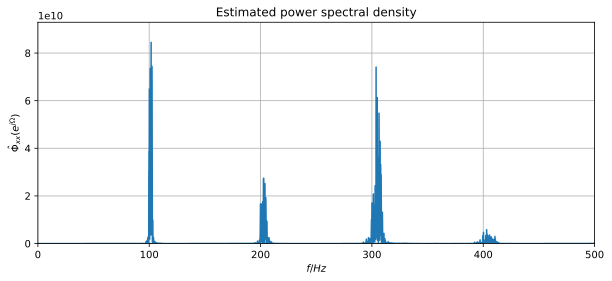

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
%matplotlib inline

# read audio file
fs, x = wavfile.read('../data/vocal_o_8k.wav')
x = np.asarray(x, dtype=float)
N = len(x)

# compute ACF
acf = 1/N * np.correlate(x, x, mode='full')
# compute PSD
psd = np.fft.fft(acf)
psd = psd * np.exp(1j*np.arange(2*N-1)*2*np.pi*(N-1)/(2*N-1))
f = np.fft.fftfreq(2*N-1, d=1/fs)

# plot PSD
plt.figure(figsize = (10, 4))
plt.plot(f, np.real(psd))
plt.title('Estimated power spectral density')
plt.ylabel(r'$\hat{\Phi}_{xx}(e^{j \Omega})$')
plt.xlabel(r'$f / Hz$')
plt.axis([0, 500, 0, 1.1*max(np.abs(psd))])
plt.grid()

**Exercise**

* What does the PSD tell you about the average spectral contents of a speech signal?

Solution: The speech signal exhibits a harmonic structure with the dominant fundamental frequency $f_0 \approx 100$ Hz and a number of harmonics $f_n \approx n \cdot f_0$ for $n > 0$. This due to the fact that vowels generate random signals which are in good approximation periodic. To generate vowels, the sound produced by the periodically vibrating vowel folds is filtered by the resonance volumes and articulators above the voice box. The spectrum of periodic signals is a line spectrum.

## Cross-Power Spectral Density

The cross-power spectral density is defined as the Fourier transformation of the [cross-correlation function](correlation_functions.ipynb#Cross-Correlation-Function) (CCF).

### Definition

For two continuous-amplitude, real-valued, wide-sense stationary (WSS) random signals $x[k]$ and $y[k]$, the cross-power spectral density is given as

\begin{equation}
\Phi_{xy}(\mathrm{e}^{\,\mathrm{j} \, \Omega}) = \mathcal{F}_* \{ \varphi_{xy}[\kappa] \},
\end{equation}

where $\varphi_{xy}[\kappa]$ denotes the CCF of $x[k]$ and $y[k]$. Note again, that the DTFT is performed with respect to $\kappa$. The CCF of two random signals of finite length $N$ and $M$ can be expressed by way of a linear convolution

\begin{equation}
\varphi_{xy}[\kappa] = \frac{1}{N} \cdot x_N[k] * y_M[-k].
\end{equation}

Note the chosen $\frac{1}{N}$-averaging convention corresponds to the length of signal $x$. If $N \neq M$, care should be taken on the interpretation of this normalization. In case of $N=M$ the $\frac{1}{N}$-averaging yields a [biased estimator](https://en.wikipedia.org/wiki/Bias_of_an_estimator) of the CCF, which consistently should be denoted with $\hat{\varphi}_{xy,\mathrm{biased}}[\kappa]$.


Taking the DTFT of the left- and right-hand side from above cross-correlation results in

\begin{equation}
\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \, X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})\, Y_M(\mathrm{e}^{-\,\mathrm{j}\,\Omega}).
\end{equation}

### Properties

1. The symmetries of $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ can be derived from the symmetries of the CCF and the DTFT as

    $$ \underbrace {\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \Phi_{xy}^*(\mathrm{e}^{-\,\mathrm{j}\, \Omega})}_{\varphi_{xy}[\kappa] \in \mathbb{R}} = 
\underbrace {\Phi_{yx}(\mathrm{e}^{\,- \mathrm{j}\, \Omega}) = \Phi_{yx}^*(\mathrm{e}^{\,\mathrm{j}\, \Omega})}_{\varphi_{yx}[-\kappa] \in \mathbb{R}},$$

    from which $|\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\, \Omega})| = |\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\, \Omega})|$ can be concluded.

2. The cross PSD of two uncorrelated random signals is given as

    $$ \Phi_{xy}(\mathrm{e}^{\,\mathrm{j} \, \Omega}) = \mu_x^2 \mu_y^2 \cdot {\bot \!\! \bot \!\! \bot}\left( \frac{\Omega}{2 \pi} \right) $$
    
    which can be deduced from the CCF of an uncorrelated signal.

### Example - Cross-Power Spectral Density

The following example estimates and plots the cross PSD $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ of two random signals $x_N[k]$ and $y_M[k]$ of finite lengths $N = 64$ and $M = 512$.

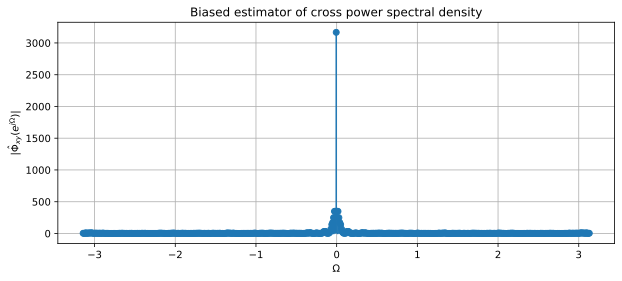

In [2]:
N = 64  # length of x
M = 512  # length of y

# generate two uncorrelated random signals
np.random.seed(1)
x = 2 + np.random.normal(size=N)
y = 3 + np.random.normal(size=M)
N = len(x)
M = len(y)

# compute cross PSD via CCF
acf = 1/N * np.correlate(x, y, mode='full')
psd = np.fft.fft(acf)
psd = psd * np.exp(1j*np.arange(N+M-1)*2*np.pi*(M-1)/(2*M-1))
psd = np.fft.fftshift(psd)
Om = 2*np.pi * np.arange(0, N+M-1) / (N+M-1)
Om = Om - np.pi

# plot results
plt.figure(figsize=(10, 4))
plt.stem(Om, np.abs(psd), basefmt='C0:', use_line_collection=True)
plt.title('Biased estimator of cross power spectral density')
plt.ylabel(r'$|\hat{\Phi}_{xy}(e^{j \Omega})|$')
plt.xlabel(r'$\Omega$')
plt.grid()

**Exercise**

* What does the cross PSD $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j} \, \Omega})$ tell you about the statistical properties of the two random signals?

Solution: The cross PSD $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j} \, \Omega})$ is essential only non-zero for $\Omega=0$. It hence can be concluded that the two random signals are not mean-free and uncorrelated to each other.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.